Desafios bootcamp da dio da geração unimed bh

In [ ]:
# importando a biblioteca pandas

import pandas as pd

In [ ]:
"""
OBS: O parametro error_bad_lines e utilizado caso a base de dados contém algum erro isso faz com que 
ela seja executada e é ignorada o erro

O parametro sep e o separado. Utilizo caso queira trocar o separador da base de dados
"""

df = pd.read_csv('/content/drive/MyDrive/desafio bootcamp /datasets/Gapminder.csv', error_bad_lines=False, sep=';')

In [ ]:
# Renomeando os nomes das colunas

df = df.rename(columns={
          'country': 'Pais',
          'continent': 'Continente',
          'year': 'Ano',
          'lifeExp': 'Expectativa de vida',
          'pop': 'Pop Total',
          'gdpPercap': 'PIB'})

In [ ]:
df.head()

,Pais,Continente,Ano,Expectativa de vida,Pop Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
# Tipos de dados
df.dtypes

Pais                    object
Continente              object
Ano                      int64
Expectativa de vida    float64
Pop Total                int64
PIB                    float64
dtype: object

In [ ]:
# Ultimas linhas 
df.tail()

,Pais,Continente,Ano,Expectativa de vida,Pop Total,PIB
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623
3311,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
# Pegando os continentes e utilizando o unique

df['Continente'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [ ]:
# Filtrando o continente para achar oceania
oceania = df.loc[df['Continente'] == 'Oceania']
oceania.head()

,Pais,Continente,Ano,Expectativa de vida,Pop Total,PIB
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


In [ ]:
oceania['Continente'].unique()

array(['Oceania'], dtype=object)

In [ ]:
# Utilizando o groupy by para saber quantos paises tem dentros dos continentes

df.groupby('Continente')['Pais'].nunique()

Continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Pais, dtype: int64

In [ ]:
# Utilizando o groupby para fazer um agrupamento de anos por a media de expectativa de vida
# Utilizando o loc para fazer um filtro dos anos maior ou igual a 2000
d = df.groupby('Ano')['Expectativa de vida'].mean()
d.loc[d.index >= 2000]

Ano
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921562
2005    76.718667
2006    77.887778
2007    67.868557
Name: Expectativa de vida, dtype: float64

In [ ]:
# Media do pib
df['PIB'].mean()

11317.115804696648

# **Trabalhando com planilhas do excel**

In [ ]:
# Extraindo a base de dados

vendas_aracaju = pd.read_excel('/content/drive/MyDrive/desafio bootcamp /datasets/Aracaju.xlsx')
vendas_fortaleza = pd.read_excel('/content/drive/MyDrive/desafio bootcamp /datasets/Fortaleza.xlsx')
vendas_natal = pd.read_excel('/content/drive/MyDrive/desafio bootcamp /datasets/Natal.xlsx')
vendas_recife = pd.read_excel('/content/drive/MyDrive/desafio bootcamp /datasets/Recife.xlsx')
vendas_salvador = pd.read_excel('/content/drive/MyDrive/desafio bootcamp /datasets/Salvador.xlsx')

In [ ]:
# Concatenando elas para um dataframe

df = pd.concat([vendas_aracaju, vendas_fortaleza, vendas_natal, vendas_recife,
                vendas_salvador])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


In [ ]:
df.shape

(894, 5)

In [ ]:
# Verificando as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Verificando as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Amostra do nosso base de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
48,Fortaleza,2019-01-01,40.71,1002,6
87,Recife,2019-01-01,210.06,983,4
44,Aracaju,2018-01-01,11.42,1520,5
43,Aracaju,2018-01-01,19.63,1523,9
41,Fortaleza,2019-02-13,191.29,1002,3


In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado da coluna lojaid

df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
# Verificando valores nulos 
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Criando uma nova coluna com valor total de vendas
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df['Receita']

0      142.00
1       85.26
2       71.55
3       21.07
4      196.08
        ...  
235     41.84
236    378.87
237    114.18
238    139.64
239    484.23
Name: Receita, Length: 894, dtype: float64

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# nlargest retorna a quantidade de linha que eu quero com base na coluna que eu passar
# O exemplo abaixo retorna as 3 linhas com maiores receitas 

df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# nsamllest retorna a quantidade de linha que eu quero com base na coluna que eu passar
# O exemplo abaixo retorna as 3 linhas com  as piores receitas 

df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupamento por receita utilizando o groupby

df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordernando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# **Trabalhando com Data**

In [ ]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano 
# dt de datetime
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df["Ano_Venda"]

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
235    2019
236    2019
237    2019
238    2019
239    2019
Name: Ano_Venda, Length: 894, dtype: int64

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
92,Salvador,2019-01-01,4.57,1035,1,4.57,2019
153,Salvador,2019-01-02,17.41,1035,2,34.82,2019
237,Natal,2019-01-03,38.06,1036,3,114.18,2019
90,Aracaju,2018-01-01,16.27,1522,1,16.27,2018
26,Natal,2018-07-20,370.00,853,3,1110.00,2018


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
70,Fortaleza,2019-01-01,79.57,1002,5,397.85,2019,1,1
80,Natal,2018-05-23,264.00,852,3,792.00,2018,5,23
98,Aracaju,2018-01-01,138.33,1521,10,1383.30,2018,1,1
34,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019,1,1
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
111,Recife,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days
163,Salvador,2019-01-02,17.66,1036,3,52.98,2019,1,2,366 days
13,Recife,2019-02-12,15.33,983,5,76.65,2019,2,12,407 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
148,Natal,2019-01-02,40.59,1037,3,121.77,2019,1,2,366 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
25,Aracaju,2018-01-01,34.66,1521,8,277.28,2018,1,1,0 days,1
66,Aracaju,2018-01-01,76.59,1523,4,306.36,2018,1,1,0 days,1
143,Natal,2019-01-02,41.18,1037,2,82.36,2019,1,2,366 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days,1
141,Salvador,2019-03-02,9.08,1036,1,9.08,2019,3,2,425 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1


# **Visualização de dados**

In [ ]:
# Imprimindo do maior para o menor

df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

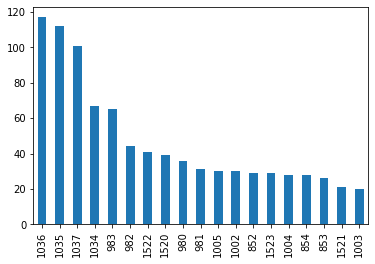

In [ ]:
# Gráfico de barras 
df['LojaID'].value_counts(ascending=False).plot.bar();

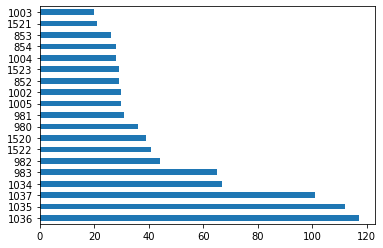

In [ ]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh();

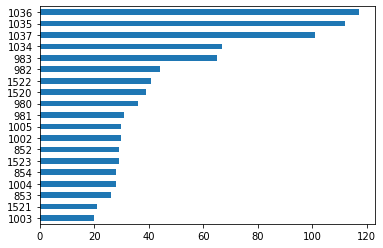

In [ ]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

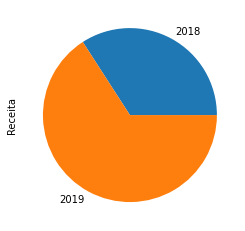

In [ ]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [ ]:
# Total de vendas por cidade 
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

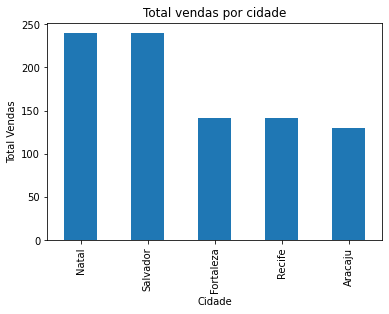

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

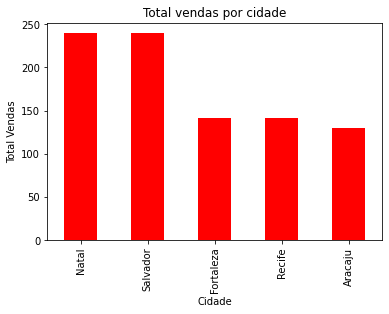

In [ ]:
# Alterando cor 
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [ ]:
# Alterando o estilo 
plt.style.use('ggplot')

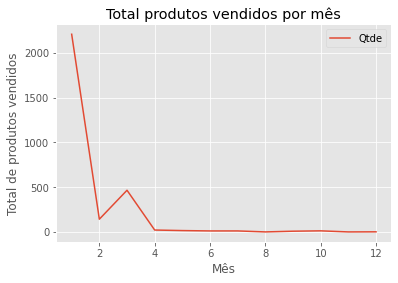

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


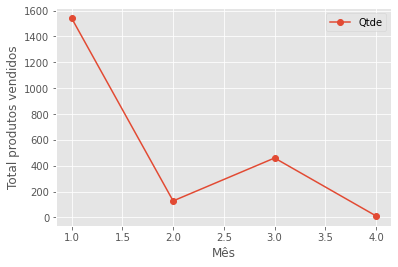

In [ ]:
# Total de produtos vendidos por mês

df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

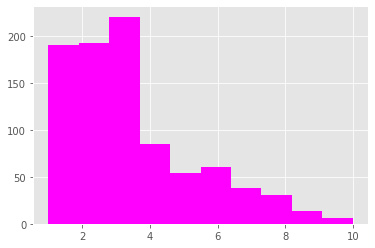

In [ ]:
# Histograma 
plt.hist(df['Qtde'], color='magenta');

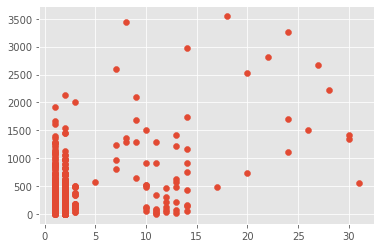

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

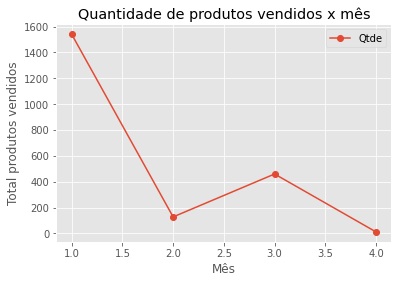

In [ ]:
# Salvando um png
plt.title('Quantidade de produtos vendidos x mês')
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

# Salva a figura em imagem 
plt.savefig('Gráfico qtde x mes.png')